# DataDash

### Final- and Visualization

## Finding Lineage Subtypes and Primary Diseases for the ranked lists 

In [11]:
allGenes.shape
data.shape

(764, 24)

In [7]:
allGenes.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
HEL,0.178087,0.088290,-0.201464,-0.017011,0.042590,-0.192257,0.352891,-0.445209,0.292603,0.165168,...,-0.122795,-0.464567,NaN,NaN,0.258084,0.237593,-0.408563,0.291832,0.218575,-0.139759
HEL9217,-0.082364,0.239413,0.195457,0.163763,-0.188161,-0.338735,0.254489,-0.583878,-0.060615,0.015272,...,-0.195061,-0.408063,-0.155155,-0.067415,0.229242,-0.075883,-0.104001,0.075901,0.036985,-0.243303
LS513,0.070026,0.075066,-0.064637,0.156905,0.099075,0.141985,0.066314,-0.477023,-0.006855,0.291604,...,-0.093252,-0.276874,-0.049716,0.116683,0.211699,-0.012654,-0.351716,0.089140,-0.392549,-0.442624
C2BBE1,0.107048,-0.006352,-0.053166,0.053055,0.081620,-0.038305,0.082421,-0.642935,0.159178,0.064128,...,-0.280677,-0.230111,-0.106000,0.041611,0.083021,0.022771,-0.596777,0.197627,-0.106398,-0.549259
253J,0.280508,0.079860,0.016981,0.439139,-0.042239,-0.242560,0.103028,-0.419159,0.141445,0.115857,...,-0.410500,-0.507467,-0.138665,-0.119292,0.284407,0.158124,-0.240429,0.124847,-0.250949,-0.379117


In [10]:
allGenes.A1CF.sort_values()

HEPG2        -0.739745
DETROIT562   -0.461320
PLCPRF5      -0.293700
SMSCTR       -0.274631
NB4          -0.243497
                ...   
NCIH2052      0.447630
CORL23        0.451628
SW948         0.471252
CL11          0.485900
CALU1         0.530820
Name: A1CF, Length: 783, dtype: float64

In [166]:
# phosphatases and their differences in mean essentiality (which we use for ranking)
print(np.mean(allGenes.PALD1.values))
print(np.mean(allGenes.SSH1.values))
print(np.mean(allGenes.DUSP1.values))
print(np.mean(allGenes.ACP5.values))
print(np.mean(dropna('EYA3')))
print(np.mean(allGenes.CDC25A.values))
print('\n one phosphatase we discussed explicitly:')
print(np.mean(allGenes.PTPN14.values))

0.16807727490550167
-0.238110076118746
0.08081167760847498
0.06438609925667071
-0.16825153823843356
-0.32118639398125276

 one phosphatase we discussed explicitly:
0.3072329011584412


we find diverse values in mean essentiality for phosphatases, which is i guess a good sign if we want to 
make the point that they may act as TS or ON depending on circumstance?

names of human phosphatases from:
https://stke.sciencemag.org/content/10/474/eaag1796
this paper also discusses gains and losses of kinases and phosphatases during evolution of animals.
sea urchins and humans have a lot of kinases and phosphatases apparently.
see also sea urchin developmental circuit model.

#### looking at interesting pairs, and interesting genes -- something to creatively immerese into. (Manolis lectures)

In [15]:
np.mean(allGenes.A1CF.values)

0.0649078156593701

In [150]:
np.mean(allGenes.ERN1.values)

0.051147041000601835

In [16]:
np.mean(allGenes.CDK4.values)

-0.5918829012839365

In [17]:
np.mean(allGenes.CDK6.values)

-0.5740071648723523

In [20]:
z  =  allGenes.CCNE1.values
z  = z[~np.isnan(z)]
np.mean(z)

-0.16565153782823971

In [104]:
def dropna(x):
    x = allGenes.eval(x).values
    x  = x[~np.isnan(x)]
    return x

In [21]:
np.mean(allGenes.NF2.values)

0.2006269385855976

In [24]:
np.mean(allGenes.TAOK1.values)

0.22674455056776177

In [14]:
# ranking individual genes
np.mean(allGenes.RAC1.values)

-0.7156697253493115

In [105]:
np.mean(dropna('CDKN2A'))

-0.06478059580026907

In [ ]:
# interesting, since this is very close to zero and effects the ranking. 
# thus this well known tumor suppressor is not ranked as a tumor suppressor

In [149]:
np.mean(allGenes.CDKN1B.values)

-0.005179223931646754

## CDKN2A, CDKN1B machen troubles da sie leicht negativ sind, jedoch definitiv tumorsuppressoren sind.

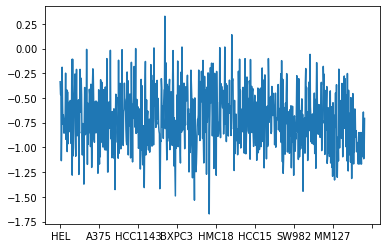

In [18]:
allGenes.RAC1.plot()

In [20]:
sum(allGenes.RAC1 > 0)

6

In [21]:
len(allGenes.RAC1)


783

In [22]:
sum(allGenes.RAC1 < 0)

777

## The way out may be to rank all of them, look at all the averages, and then, for the ones close to 0, see if there are well known TS, ON there

## Vorgeschlagene Kontrollen:

In [86]:
print(np.mean(allGenes.NF2.values))
print(np.mean(allGenes.ABL2.values))
print("\n")
print(np.mean(allGenes.CDK6.values))
print(np.mean(allGenes.CCND3.values))
print("\n")
print(np.mean(allGenes.CDK4.values))
CCND1 =  allGenes.CCND1.values
CCND1  = CCND1[~np.isnan(CCND1)]
print(np.mean(CCND1))

# paare sollten gleich gerankt sein, dies ist der fall

0.2006269385855976
0.19726064158013018


-0.5740071648723523
-0.3245041889444823


-0.5918829012839365
-1.030998687748558


In [10]:
mydict = {}
for _ in allGenes:
    if allGenes[_].sum(skipna=True)/allGenes.shape[0] > 0:
        mydict[_] = allGenes[_].sort_values(ascending=False)
    else:
        mydict[_] = allGenes[_].sort_values()

In [99]:
mydict['RPL10']

C99                    -2.115653
KPNYN                  -2.082575
SKNFI                  -2.071361
AML193                 -2.031605
T98G                   -1.869772
                          ...   
HEC1B                        NaN
REH                          NaN
ISHIKAWAHERAKLIO02ER         NaN
DLD1                         NaN
WM2664                       NaN
Name: RPL10, Length: 783, dtype: float64

In [25]:
mydict['RAC1']

OV7        -1.673017
MDAMB157   -1.533995
UMUC3      -1.491206
GIMEN      -1.443809
HS852T     -1.427068
              ...   
GSS         0.008830
AML193      0.015141
NCIH526     0.015232
SHP77       0.139218
VMRCRCW     0.326276
Name: RAC1, Length: 783, dtype: float64

In [68]:
averages = {}
for _ in allGenes:
    averages[_] = np.mean(allGenes[_].values)

In [78]:
avlist = list(averages.values())
avdf = pd.DataFrame(avlist)

Text(0.5, 1.0, 'distribution of gene effect averages')

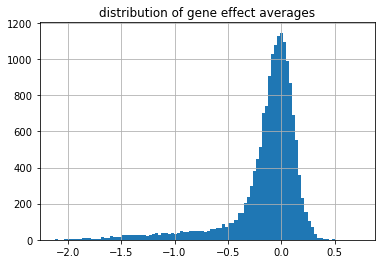

In [84]:
avdf.hist(bins=100)
plt.title('distribution of gene effect averages')
# für die ts, sollten wir schauen ob die hohen untereinander korreliert sind.
# check overlap with ts listsgg

In [127]:
avg = list(averages.values())
#avg

[0.10460866039455245,
 0.0649078156593701,
 -0.062027707481887503,
 0.179318510511796,
 -0.0418919748544033,
 -0.05242560601681503,
 0.11796949218854696,
 -0.5190672288024969,
 0.06863399070087597,
 0.1535344787402319,
 0.15606289668046391,
 -0.019196068197299195,
 -0.025471976136430433,
 nan,
 -0.045425963866203255,
 0.007863638464268415,
 -0.30826279969742293,
 -0.031038559077324248,
 -0.801227198959689,
 -0.19968716006347298,
 -0.055338444398908226,
 -0.21804802273102103,
 -1.6973901400748261,
 -0.7660449852797406,
 -0.2474150004590657,
 -0.04553931896749752,
 -0.5614277404834598,
 nan,
 -0.6397939949812029,
 -0.17348402480132516,
 nan,
 -0.01951757392019493,
 0.23961778803083528,
 -0.08810020823655293,
 -0.01906233198308319,
 -0.012413015254503324,
 -0.04744044641580685,
 -0.1261660651982158,
 -0.08155732155843007,
 0.18504272591153315,
 0.05789556036349661,
 -0.02959896663146326,
 0.17142805045297485,
 -0.06325298544558337,
 -0.46813551159965366,
 0.009395383902130027,
 -0.0225802

In [169]:
rankings = {}
for _ in averages.keys():
    if averages[_] > 0:
        rankings[_] = "+"
    else:
        rankings[_] = '-'


In [170]:
rankings
# has all the rankings for all the genes

{'A1BG': '+',
 'A1CF': '+',
 'A2M': '-',
 'A2ML1': '+',
 'A3GALT2': '-',
 'A4GALT': '-',
 'A4GNT': '+',
 'AAAS': '-',
 'AACS': '+',
 'AADAC': '+',
 'AADACL2': '+',
 'AADACL3': '-',
 'AADACL4': '-',
 'AADAT': '-',
 'AAED1': '-',
 'AAGAB': '+',
 'AAK1': '-',
 'AAMDC': '-',
 'AAMP': '-',
 'AANAT': '-',
 'AAR2': '-',
 'AARD': '-',
 'AARS': '-',
 'AARS2': '-',
 'AARSD1': '-',
 'AASDH': '-',
 'AASDHPPT': '-',
 'AASS': '-',
 'AATF': '-',
 'AATK': '-',
 'ABAT': '-',
 'ABCA1': '-',
 'ABCA10': '+',
 'ABCA12': '-',
 'ABCA13': '-',
 'ABCA2': '-',
 'ABCA3': '-',
 'ABCA4': '-',
 'ABCA5': '-',
 'ABCA6': '+',
 'ABCA7': '+',
 'ABCA8': '-',
 'ABCA9': '+',
 'ABCB1': '-',
 'ABCB10': '-',
 'ABCB11': '+',
 'ABCB4': '-',
 'ABCB5': '-',
 'ABCB6': '-',
 'ABCB7': '-',
 'ABCB8': '+',
 'ABCB9': '-',
 'ABCC1': '+',
 'ABCC10': '-',
 'ABCC11': '+',
 'ABCC12': '+',
 'ABCC2': '-',
 'ABCC3': '-',
 'ABCC4': '+',
 'ABCC5': '+',
 'ABCC6': '-',
 'ABCC8': '+',
 'ABCC9': '+',
 'ABCD1': '-',
 'ABCD2': '+',
 'ABCD3': '-',
 'AB

kinases

In [234]:
kt = ["ALK",
"BRAF",
"JAK1",
"JAK2",
"JAK3",]

In [217]:
kinases = ["A6",
"ABL",
"CK1aps3",
"ACK",
"ACTR2",
"ACTR2B",
"ADCK4",
"Trb1",
"BRSK2",
"Wnk2",
"MARKps27",
"AKT1",
"AKT2",
"AKT3",
"CaMK1g",
"MARKps28",
"ALK",
"ALK1",
"ALK2",
"BMPR1A",
"ALK4",
"TGFbR1",
"BMPR1B",
"AMPKa1",
"AMPKa2",
"ANPa",
"ANPb",
"ARAF",
"ARG",
"ATM",
"ATR",
"AurBps1",
"AurAps1",
"AurAps2",
"AurC",
"AXL",
"BARK1",
"BCKDK",
"BCR",
"GCK",
"BLK",
"BRAF",
"BRK",
"BTK",
"BUBR1",
"CDK7",
"CaMK1a",
"CaMK2a",
"CaMK2b ",
"CaMK2g",
"CaMK4",
"VACAMKL",
"DCAMKL1",
"CASK",
"CDC2",
"CDC7",
"CDK2",
"CDK3",
"CDK4",
"CDK5",
"CDK6",
"CDK8",
"PKG1",
"PKG2",
"CHED",
"CHK1",
"CHK2",
"CK1a",
"CK1d",
"CK1e",
"CK1g2",
"CK1g3",
"CK2a1",
"CK2a2",
"CLK1",
"CLK2",
"CLK3",
"COT",
"FMS",
"CSK",
"MARK3",
"CYGD",
"CYGF",
"DAPK1",
"DAPK2",
"DLK",
"DMPK1",
"DMPK2",
"DNAPK",
"DYRK1B",
"DYRK2",
"DYRK4",
"eEF2K",
"EGFR",
"PKR",
"MARK2",
"EphA1",
"EphA2",
"EphA3",
"EphA4",
"EphA5",
"EphA8",
"EphB1",
"EphB2",
"EphB3",
"EphB4",
"EphB6",
"Erk1",
"Erk2",
"Erk3",
"Erk4",
"FAK",
"FASTK",
"FER",
"FERps",
"FES",
"FGFR1",
"FGFR2",
"FGFR3",
"FGFR4",
"FGR",
"FLT3",
"FLT1",
"FLT4",
"FRAP",
"FYN",
"GAK",
"GPRK4",
"GPRK5",
"GPRK6",
"Trb2",
"GSK3A",
"GSK3B",
"HCK",
"HER2/ErbB2",
"HER3/ErbB3",
"HER4/ErbB4",
"HIPK1",
"HPK1",
"HSER",
"IGF1R",
"IKKa",
"IKKb",
"ILK",
"INSR",
"IRAK1",
"IRAK2",
"IRAK3",
"IRE1",
"IRR",
"ITK",
"JAK1",
"JAK2",
"JAK3",
"JNK1",
"JNK2",
"JNK3",
"KHS1",
"IKKe",
"NuaK1",
"MAST3",
"Fused",
"PIM3",
"KIT",
"CDKL2",
"CDKL1",
"KSR1",
"LCK",
"LIMK2",
"LKB1",
"LTK",
"LYN",
"MAK",
"MAPKAPK2",
"MAPKAPK3",
"MAPKAPK5",
"MARK1",
"MAST2",
"MAP2K1",
"MAP2K2",
"MAP2K5",
"MAP2K6",
"MAP3K1",
"MAP3K2",
"MAP3K3",
"MAP3K4",
"MAP3K5",
"MER",
"MET",
"MISR2",
"MAP2K7",
"smMLCK",
"MLK1",
"MLK2",
"DYRK1A",
"MNK1",
"MNK2",
"MOS",
"MAP2K3",
"MAP2K4",
"MPSK1ps",
"MRCKb",
"MSK1",
"MSK2",
"MST1",
"MST2",
"MST3",
"MUSK",
"MYT1",
"NDR1",
"NEK1",
"NEK2",
"NEK3",
"NIK",
"NLK",
"NEK4",
"IRAK4",
"PIK3R4",
"ROCK2",
"p38a",
"p70S6K",
"p70S6Kb",
"PAK1",
"PAK2",
"PAK3",
"PKCh",
"PCTAIRE1",
"PCTAIRE2",
"PCTAIRE3",
"PDGFRa",
"PDGFRb",
"PDK1",
"PDHK1",
"PDHK2",
"PDHK3",
"PDHK4",
"PEK",
"PFTAIRE1",
"PHKg1",
"PHKg2",
"PIM1",
"PIM2",
"CDK10",
"CDK9",
"PITSLRE",
"MELK",
"MRCKa",
"PKACa",
"PKACb",
"PKACg",
"PKCa",
"PKCb",
"PKCd",
"PKCe",
"PKCg",
"PKCi",
"PKD1",
"PKCt",
"PKCz",
"PRKX",
"HIPK3",
"PLK1",
"PLK3",
"PKN1",
"PKN2",
"PRKXps",
"PRKY",
"PRP4",
"PSKH1",
"RAF1",
"RAF1ps",
"RET",
"RHOK",
"RIPK1",
"RIPK2",
"RIPK3",
"ROCK1",
"RON",
"ROR1",
"ROR2",
"ROS",
"RSK1",
"RSK2",
"RSK3",
"RYK",
"PLK4",
"p38b",
"p38g",
"p38d",
"MAST1",
"SGK",
"MAP2K1ps",
"SLK",
"PLK2",
"MLK3",
"SRC",
"SRPK1",
"SRPK2",
"CDKL5",
"TAO2",
"SYK",
"TAK1",
"BMPR2",
"TEC",
"TIE2",
"TESK1",
"TGFbR2",
"TIE1",
"TTN",
"TLK1",
"TLK2",
"TNK1",
"Trio",
"TRKA",
"TRKB",
"TRKC",
"TRRAP",
"TTK",
"TXK",
"TYK2",
"TYRO3",
"ULK1",
"ULK2",
"VRK1",
"VRK2",
"Wee1",
"YES",
"YESps",
"YSK1",
"ZAP70",
"LZK",
"DDR1",
"ADCK1",
"KDR",
"ALK7",
"AurB",
"AurA",
"Erk5",
"BUB1",
"DDR2",
"CCK4",
"LIMK1",
"LMR1",
"LMR2",
"LMR3",
"EphA7",
"BMX",
"CTK",
"FRK",
"NEK6",
"NEK7",
"AAK1",
"ChaK1",
"PYK2",
"SRM",
"LOK",
"KHS2",
"OSR1",
"PAK6",
"PAK4",
"MST4",
"STLK3",
"STLK5",
"STLK6",
"TAO3",
"TAO1",
"ZC1/HGK",
"ZC2/TNIK",
"ZC3/MINK",
"ZC4/NRK",
"LATS1",
"LATS2",
"CDK11",
"NIM1",
"ULK3",
"CLIK1L",
"TTBK2",
"SCYL1",
"MASTL",
"PINK1",
"ULK4",
"MLKL",
"DCAMKL3",
"SgK493",
"PFTAIRE2",
"STK33",
"PRPK",
"Erk7",
"CDKL4",
"MARKps11",
"SCYL3",
"YANK3",
"NEK9",
"TSSK3",
"NuaK2",
"RSKL2",
"TSSK2",
"SCYL2",
"NEK8",
"MARKps26",
"BARK2",
"NRBP1",
"PKD2",
"YANK2",
"CaMKK2",
"CCRK",
"CLK4",
"CRK7",
"DRAK1",
"DRAK2",
"DYRK3",
"PKD3",
"GCN2",
"SgK494",
"SgK495",
"CLIK1",
"HH498",
"HIPK2",
"HRI",
"ICK",
"IRE2",
"PASK",
"NDR2",
"QSK",
"HUNK",
"MAP3K6",
"ZAK",
"MOK",
"MPSK1",
"MSSK1",
"Wnk1",
"CDKL3",
"PAK5",
"PKN3",
"A6r",
"QIK",
"MARK4",
"SgK496",
"RSKL1",
"RSK4",
"NRBP2",
"SgK071",
"SgK384ps",
"SGK2",
"SSTK",
"SGK3",
"TTBK1",
"DCAMKL2",
"Slob",
"PBK",
"SuRTK106",
"TBK1",
"TESK2",
"Trad",
"TSSK4",
"VRK3",
"caMLCK",
"SPEG",
"CDK5ps",
"GPRK6ps",
"MAP2K2ps",
"CK1a2",
"Erk3ps1",
"MARKps18",
"KSGCps",
"Wee1Bps",
"ANKRD3",
"MARKps16",
"MAPKAPKps1",
"MARKps19",
"MARKps17",
"PLK1ps1",
"MARKps20",
"MARKps15",
"PAK2ps",
"NEK5",
"PHKg1ps1",
"MARKps12",
"CK1aps1",
"TLK1ps",
"LIMK2ps",
"SAKps",
"ARAFps",
"CDK8ps",
"SgK050ps",
"CaMK1d",
"MAP3K8",
"NEK11",
"CHK2ps1",
"MARKps09",
"MARKps10",
"GPRK7",
"MARKps13",
"SgK069",
"HIPK4",
"MYO3B",
"TSSKps2",
"NEK2ps1",
"NEK4ps",
"MARKps01",
"Wnk4",
"PRP4ps",
"MARKps29",
"SgK110",
"MARKps22",
"PHKg1ps2",
"SRPK2ps",
"Erk3ps3",
"BRSK1",
"MARKps30",
"TSSKps1",
"Obscn",
"PSKH2",
"CDK7ps",
"SIK",
"KSR2",
"RIOK3",
"ADCK3",
"RIOK1",
"YANK1",
"SNRK",
"EphA10",
"SgK196",
"Wee1ps1",
"MARKps23",
"STLK6ps1",
"HRIps",
"MARKps21",
"CK1aps2",
"CGDps",
"MYO3A",
"Erk3ps4",
"CK1g2ps",
"p70S6Kps2",
"Wnk3",
"PSKH1ps",
"SgK223",
"NEK10",
"EphA6",
"CK1g1",
"PLK1ps2",
"SgK269",
"SBK",
"MARKps24",
"SgK396",
"SgK288",
"MRCKps",
"KIS",
"CaMK1b",
"PHKg1ps3",
"TBCK",
"SMG1",
"MARKps02",
"BRAFps",
"FLT1ps",
"skMLCK",
"STK33ps",
"MAP3K7",
"CLK3ps",
"MARKps03",
"Erk3ps2",
"LRRK2",
"MLK4",
"Haspin",
"Trb3",
"CRIK",
"TLK2ps2",
"CaMKK1",
"LRRK1",
"SgK307",
"RYKps",
"MAST4",
"CaMK2d",
"BIKE",
"TSSK1",
"MST3ps",
"SgK424",
"TYRO3ps",
"SgK085",
"CLK2ps",
"PKCips",
"ADCK2",
"MNK1ps",
"SCYL2ps",
"DAPK3",
"MARKps25",
"MARKps05",
"Wee1B",
"MARKps07",
"RNAseL",
"CHK2ps2",
"VRK3ps",
"CDK4ps",
"MARKps08",
"Wee1ps2",
"BMPR1Aps1",
"BMPR1Aps2",
"p70S6Kps1",
"MARKps04",
"ChaK2",
"STLK6-rs",
"NEK2ps2",
"CK2a1-rs",
"TLK2ps1",
"A6ps1",
"RIOK2",
"AlphaK2",
"AlphaK3",
"G11",
"BRD2",
"BRD3",
"BRD4",
"BRDT",
"AlphaK1",
"A6ps2",
"RIOK3ps",
"TAF1",
"NEK2ps3",
"ADCK5",
"TAF1L",
"H11",
"TIF1a",
"TIF1b",
"TIF1g",]

In [219]:
kines = kinases[100:130]

In [215]:
len(kinases)
allGenes[kinases[4]]

KeyError: 4

In [235]:
kinase_averages = {}
for _ in kt:
    kinase_averages[_] = np.mean(allGenes[_].values)

In [238]:
kinase_averages

{'ALK': -0.18368753370711507,
 'BRAF': -0.23755647947752304,
 'JAK1': -0.11406687184599724,
 'JAK2': nan,
 'JAK3': -0.1912395789437418}

In [141]:
len([y for y in avg if y > -0.01 if y < 0.01])

823

In [142]:
len(avg)

18119

823 von 18119 fallen in dieses Fenster -0.01 bis 0.01
4.5 percent

40% sind zwischen -0.1 und 0.1.   Das könnte mit der Interpretation schwer werden.

In [148]:
len([y for y in avg if y > -0.1 if y < 0.1])

7371

In [199]:
gdf = pd.DataFrame(allGenes.columns)

In [28]:
uli_list = [['CDK4','RB1'],['CDK4','CDKN2C'],['CDK4','CCND1'],['CDK6','CCND3'],['CDK6','CCNE1'],['CDK6','CDK4'],['CDKN2A','CDKN2B'],
['CDKN2A','CCNE1'],['NF2','AMOTL2'],['NF2','KIRREL1'],['NF2','TAOK1'],['NF2','LATS2'],['NF2','PTPN14'],['NF2','PTEN'],['NF2','ABL2'],['NF2','RAC1'],['NF2','CRK'],['NF2','DLG5'],['NF2','PKN2']]

UL2 = [i for j in uli_list for i in j]
UL2 = set(UL2)
UL2 = list(UL2)

In [29]:
mydict = {}
for _ in UL2:
    if allGenes[_].sum(skipna=True)/allGenes.shape[0] > 0:
        mydict[_] = allGenes[_].sort_values(ascending=False)
    else:
        mydict[_] = allGenes[_].sort_values()

In [ ]:
# next step is to make a mydict for all the 18000 genes.
# sort all of them individually

# df.plot.box() 

## Looking at RAC1: Effects and Dependencies

In [50]:
RAC_list = mydict['RAC1'].index.to_list()
RAC_df = pd.DataFrame(RAC_list)

In [56]:
df = RAC_df[0:20]

In [9]:
df3 = depsorted.index.to_list()
df3 = pd.DataFrame(df3)
df3 = df3[0:20]
prd3,dis3 = get_prd_and_sub(df3)
prd3

,primary_disease
54,Brain Cancer
145,Leukemia
246,Gastric Cancer
257,Breast Cancer
304,Esophageal Cancer
338,Lung Cancer
362,Myeloma
437,Lung Cancer
482,Kidney Cancer
511,Lung Cancer


In [20]:
raceffect = mydict['RAC1'].index.to_list()
raceffect = raceffect[0:20]
df2 = pd.DataFrame(raceffect)
prd2,dis2 = get_prd_and_sub(df2)
prd2

,primary_disease
53,Sarcoma
97,Brain Cancer
131,Ovarian Cancer
273,Skin Cancer
402,Colon/Colorectal Cancer
467,Pancreatic Cancer
468,Brain Cancer
519,Bladder Cancer
611,Skin Cancer
618,Breast Cancer


# Jaccard Index

In [32]:
def jaccard(x,y):
    intersection = len(set.intersection(set(x),set(y)))
    union = len(set(x).union(set(y)))
    
    return intersection/union

In [33]:
jaccard(prd2.primary_disease.to_list(),prd3.primary_disease.to_list())

0.16666666666666666

In [53]:
def compute_jaccard_for_dep_and_effect(gene,x):
    depsorted = dep.eval(gene).sort_values()
    df3 = depsorted.index.to_list()
    df3 = pd.DataFrame(df3)
    df3 = df3[0:x]
    prd3,dis3 = get_prd_and_sub(df3)
    
    eff = mydict[str(gene)].index.to_list()
    eff = eff[0:x]
    df2 = pd.DataFrame(eff)
    prd2,dis2 = get_prd_and_sub(df2)
    return jaccard(prd2.primary_disease.to_list(),prd3.primary_disease.to_list())

In [60]:
## look into it
compute_jaccard_for_dep_and_effect('TP53',)

0.75

In [55]:
compute_jaccard_for_dep_and_effect('PTPN14',100)

0.9166666666666666

In [47]:
compute_jaccard_for_dep_and_effect('ABL2')

0.3888888888888889

In [48]:
compute_jaccard_for_dep_and_effect('NF2')

0.5625

In [63]:
compute_jaccard_for_dep_and_effect('CDK4',50)

0.47619047619047616

In [54]:
compute_jaccard_for_dep_and_effect('CDK6',100)

0.5769230769230769

In [51]:
compute_jaccard_for_dep_and_effect('CCND3')

0.21428571428571427

In [52]:
compute_jaccard_for_dep_and_effect('CCNE1')

0.2857142857142857

In [73]:
#df2 = pd.DataFrame(np.sort(dep.RAC1))
df2 = dep.RAC1.index.to_list()
#df2 = df2[0:20]
dep.RAC1

HEL              0.258286
HEL9217          0.357011
LS513            0.394414
C2BBE1           0.976374
253J             0.886337
                   ...   
OMM1             0.917996
OMM25            0.801138
P30OHK           0.682174
UCH2             0.645895
CCLFUPGI0005T    0.999533
Name: RAC1, Length: 803, dtype: float64

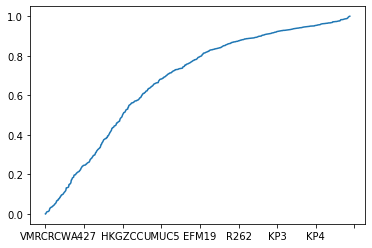

In [5]:
depsorted = dep.RAC1.sort_values()
depsorted.plot()

In [64]:
dep.RAC1

HEL              0.258286
HEL9217          0.357011
LS513            0.394414
C2BBE1           0.976374
253J             0.886337
                   ...   
OMM1             0.917996
OMM25            0.801138
P30OHK           0.682174
UCH2             0.645895
CCLFUPGI0005T    0.999533
Name: RAC1, Length: 803, dtype: float64

In [61]:
prd, dis = get_prd_and_sub(df2)

In [62]:
prd

,primary_disease


In [99]:
#dep.RAC1.plot()
#dep.PTEN.plot()

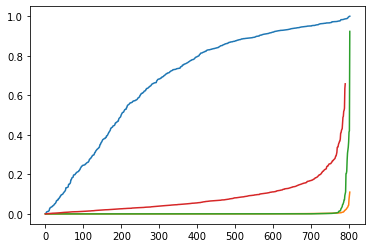

In [97]:
plt.plot(np.sort(dep.RAC1))
plt.plot(np.sort(dep.PTPN14))
plt.plot(np.sort(dep.PTEN))
plt.plot(np.sort(dep.EYA3))

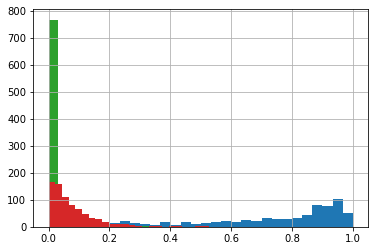

In [61]:
dep.RAC1.hist(bins=30)
dep.PTPN14.hist(bins=30)
dep.PTEN.hist(bins=30)
dep.EYA3.hist(bins=30)

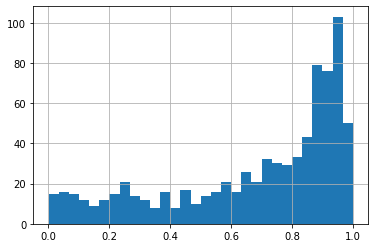

In [64]:
dep.RAC1.hist(bins=30)


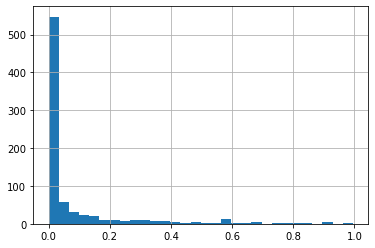

In [62]:
dep.TP53.hist(bins=30)


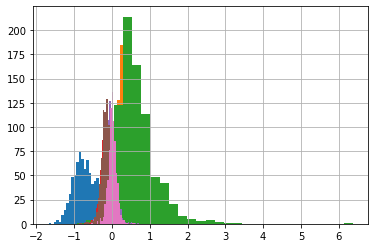

In [113]:
allGenes.RAC1.hist(bins=30)
allGenes.PTPN14.hist(bins=30)
allGenes.PTEN.hist(bins=30)
allGenes.EYA3.hist(bins=30)
allGenes.PTPN13.hist(bins=30)
allGenes.DUSP16.hist(bins=30)
allGenes.PPM1K.hist(bins=30)

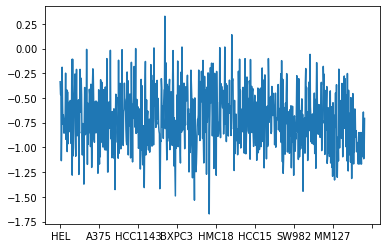

In [47]:
allGenes.RAC1.plot()

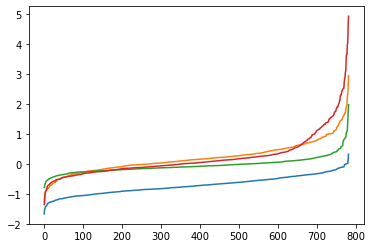

In [85]:
plt.plot(np.sort(allGenes.RAC1))
plt.plot(np.sort(allGenes.NF2))
plt.plot(np.sort(allGenes.NF1))
plt.plot(np.sort(allGenes.TP53))

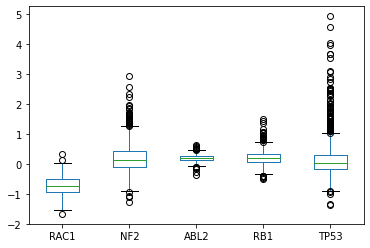

In [73]:
allGenes[['RAC1','NF2','ABL2','RB1','TP53']].plot.box()

In [ ]:
# comparing some tumor suppressors

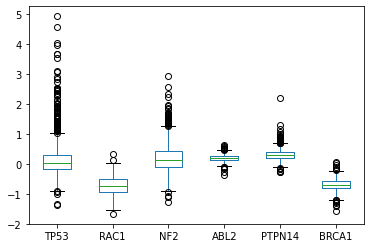

In [82]:
allGenes[['TP53','RAC1','NF2','ABL2','PTPN14','BRCA1']].plot.box()

In [ ]:
# epigenetic influences on tumor suppressors?
# methylation could be way more important for cancers then i currently imagine.
# hypermethylation in promotor regions might result in errors, ts gene silencing, misfolding and growth.
# thus methylation and the resulting eu/heterochromatin structure actively shapes chance of mutations in certain genes.

In [38]:
effect = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/data/Achilles_gene_effect.csv")
effect.head()

,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
0,ACH-000004,0.178087,0.088290,-0.201464,-0.017011,0.042590,-0.192257,0.352891,-0.445209,0.292603,...,-0.122795,-0.464567,NaN,NaN,0.258084,0.237593,-0.408563,0.291832,0.218575,-0.139759
1,ACH-000005,-0.082364,0.239413,0.195457,0.163763,-0.188161,-0.338735,0.254489,-0.583878,-0.060615,...,-0.195061,-0.408063,-0.155155,-0.067415,0.229242,-0.075883,-0.104001,0.075901,0.036985,-0.243303
2,ACH-000007,0.070026,0.075066,-0.064637,0.156905,0.099075,0.141985,0.066314,-0.477023,-0.006855,...,-0.093252,-0.276874,-0.049716,0.116683,0.211699,-0.012654,-0.351716,0.089140,-0.392549,-0.442624
3,ACH-000009,0.107048,-0.006352,-0.053166,0.053055,0.081620,-0.038305,0.082421,-0.642935,0.159178,...,-0.280677,-0.230111,-0.106000,0.041611,0.083021,0.022771,-0.596777,0.197627,-0.106398,-0.549259
4,ACH-000011,0.280508,0.079860,0.016981,0.439139,-0.042239,-0.242560,0.103028,-0.419159,0.141445,...,-0.410500,-0.507467,-0.138665,-0.119292,0.284407,0.158124,-0.240429,0.124847,-0.250949,-0.379117


In [ ]:
wie praesentieren? impress? ppt?
screenshots oder interaktiv?

In [ ]:
phosphatasen: what features in depmap can be used to identify a gene as ts, or onco?
              the answer is, for us, association with known ts or oncos via the effects/dependencies
              the problem here is that the known oncos and ts' ' are not that easy to identify due to potential multifunctionality.
              
                classification algorithms from sklearn? this would at least be a known problem.
                what we would definitly do if we had more time.

In [95]:
phos = ['MTMR14', 'PTPN13' , 'EYA1' ,   'PPM1K' , 'PPP6C', 'PTPRK', 'DUSP16','PTEN', 'PTPN14']

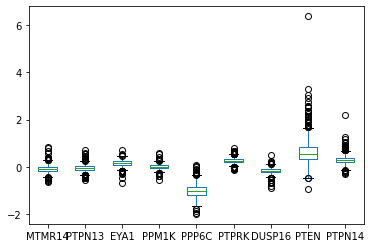

In [96]:
allGenes[phos].plot.box()

PPP6C is a phosphatase that is labelled as a oncogene.
CECR5 is labelled a cancer gene.
DUSP16, PTEN are labelled tumor suppressors.


https://stke.sciencemag.org/content/10/474/eaag1796/tab-figures-data

    genomics and evolution of human phosphatases paper    , 'PTPRQ', 'FCP1'

In [11]:
## upload the files to github 

In [8]:
uli_list = [['CDK4','RB1'],['CDK4','CDKN2C'],['CDK4','CCND1'],['CDK6','CCND3'],['CDK6','CCNE1'],['CDK6','CDK4'],['CDKN2A','CDKN2B'],
['CDKN2A','CCNE1'],['NF2','AMOTL2'],['NF2','KIRREL1'],['NF2','TAOK1'],['NF2','LATS2'],['NF2','PTPN14'],['NF2','PTEN'],['NF2','ABL2'],['NF2','RAC1'],['NF2','CRK'],['NF2','DLG5'],['NF2','PKN2']]
UL2 = [i for j in uli_list for i in j]
UL2 = set(UL2)
UL2 = list(UL2)

In [9]:
mydict = {}
for _ in UL2:
    if allGenes[_].sum(skipna=True)/allGenes.shape[0] > 0:
        mydict[_] = allGenes[_].sort_values(ascending=False)
    else:
        mydict[_] = allGenes[_].sort_values()

KeyError: 'CDK4'

In [10]:
top_cellines = {}

for _ in uli_list:
    a,b = _
    a_list = mydict[a].index.to_list()
    a_df = pd.DataFrame(a_list)

    b_list = mydict[b].index.to_list()
    b_df = pd.DataFrame(b_list)

    ranked_index = {}
    for _ in a_df.index:
        for j in b_df.index:
            ranked_index[a_df.values[_][0] + '_' + b_df.values[j][0]] = _ + j

    dataX = [v for v in sorted(ranked_index.items(), key=lambda item: item[1])]
    ceL = [ x for x in range(0,200) for x in dataX[x][0].split('_')]
    ceL = set(ceL)
    ceL = list(ceL)
    top_cellines[a + '_' + b] = ceL
    
    # store the result

KeyError: 'CDK4'

## Hypergeometric Tests

for enrichment and also for non-enrichment.

## Visualization

In [37]:
# get dep into nice working shape like effects
dep = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/data/Achilles_gene_dependency.csv")
dep.head()

,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
0,ACH-000004,0.001077,0.004165,0.099131,0.016074,0.007706,0.094475,0.000051,0.424023,0.000171,...,0.051060,0.464158,NaN,NaN,0.000318,0.000413,0.370098,0.000170,0.000534,0.056513
1,ACH-000005,0.031810,0.000941,0.001757,0.002469,0.072883,0.192318,0.000846,0.546544,0.025630,...,0.077770,0.287207,0.057451,0.025590,0.001161,0.028018,0.035445,0.006416,0.010517,0.112534
2,ACH-000007,0.003363,0.003201,0.016799,0.001036,0.002243,0.001306,0.003541,0.428076,0.008735,...,0.023888,0.130296,0.014906,0.001781,0.000450,0.009249,0.220940,0.002789,0.283513,0.365755
3,ACH-000009,0.001196,0.007132,0.012727,0.002898,0.001965,0.011081,0.001871,0.690472,0.000536,...,0.143244,0.093337,0.025420,0.003602,0.001899,0.004724,0.627729,0.000274,0.024166,0.546863
4,ACH-000011,0.000248,0.003682,0.008251,0.000017,0.015479,0.111049,0.002690,0.330648,0.001618,...,0.310653,0.471901,0.043951,0.036127,0.000220,0.001327,0.109074,0.002030,0.118438,0.271464


In [6]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from scipy.stats import pearsonr
import networkx as nx
from scipy.stats import hypergeom

effect = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/data/Achilles_gene_effect.csv")
data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/data/sample_info.csv")
# path changed to laptops

#effect = pd.read_csv("/home/lannwal/Documents/DepMap_Mining/Achilles_gene_effect.csv")
#data = pd.read_csv("/home/lannwal/Documents/DepMap_Mining/sample_info.csv")

mapping = {}

for i in np.arange(0,data.shape[0],1):
    mapping[data.DepMap_ID[i]] = data.CCLE_Name[i]

effect["INDEX"] = effect.DepMap_ID
effect = effect.set_index('INDEX')
effect = effect.rename(index=mapping)
effect = effect.drop("DepMap_ID",1)

gene = effect.columns.to_list()
# split at space
for i in range(len(gene)):
    gene[i] = gene[i].split(" ") 

genes = []
for i in range(len(gene)):
    genes.append(gene[i][0])
                 
effect.columns = genes

cellLine = effect.index.to_list()
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cellLines = []
for i in range(len(cellLine)):
    cellLines.append(cellLine[i][0])
    
effect.index = cellLines

cellLine = data['CCLE_Name'].to_list()
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cellLines1 = []
for i in range(len(cellLine)):
    cellLines1.append(cellLine[i][0])
    
data['CCLE_Name'] = cellLines1

a = set(cellLines)
b = set(data["CCLE_Name"])
c = set.intersection(a,b)

print(len(a))
print(len(b))
print(len(c))

cellL = c
allGenes = effect[effect.columns.intersection(cellL)]

765
1781
765


In [4]:
dep = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/data/Achilles_gene_dependency.csv")
data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/data/sample_info.csv")
# path changed to laptops
#effect = pd.read_csv("/home/lannwal/Documents/DepMap_Mining/Achilles_gene_effect.csv")
#data = pd.read_csv("/home/lannwal/Documents/DepMap_Mining/sample_info.csv")

mapping = {}

for i in np.arange(0,data.shape[0],1):
    mapping[data.DepMap_ID[i]] = data.CCLE_Name[i]

dep["INDEX"] = dep.DepMap_ID
dep = dep.set_index('INDEX')
dep = dep.rename(index=mapping)
dep = dep.drop("DepMap_ID",1)


gene1 = dep.columns.to_list()
# split at space
for i in range(len(gene1)):
    gene1[i] = gene1[i].split(" ") 

genes1 = []
for i in range(len(gene1)):
    genes1.append(gene[i][0])

dep.columns = genes

cellLine1 = dep.index.to_list()
# split at space
for i in range(len(cellLine1)):
    cellLine1[i] = cellLine1[i].split("_") 

cellLines1 = []
for i in range(len(cellLine1)):
    cellLines1.append(cellLine1[i][0])

dep.index = cellLines1

cellLine1 = data['CCLE_Name'].to_list()
# split at space
for i in range(len(cellLine1)):
    cellLine1[i] = cellLine1[i].split("_") 

cellLines1 = []
for i in range(len(cellLine1)):
    cellLines1.append(cellLine1[i][0])
    
data['CCLE_Name'] = cellLines1

a = set(cellLines1)
b = set(data["CCLE_Name"])
c = set.intersection(a,b)

print(len(a))
print(len(b))
print(len(c))

cellL = c


allDep = dep[dep.columns.intersection(cellL)]

1781
1781
1781


In [41]:
dep = dep.transpose()
intersect = list(set.intersection(set(allDep.index.to_list()), set(cellL)))
dep = dep[dep.columns.intersection(cellL)]

dep.shape
dep = dep.transpose()

dep.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
HEL,0.001077,0.004165,0.099131,0.016074,0.007706,0.094475,0.000051,0.424023,0.000171,0.001297,...,0.051060,0.464158,NaN,NaN,0.000318,0.000413,0.370098,0.000170,0.000534,0.056513
HEL9217,0.031810,0.000941,0.001757,0.002469,0.072883,0.192318,0.000846,0.546544,0.025630,0.012892,...,0.077770,0.287207,0.057451,0.025590,0.001161,0.028018,0.035445,0.006416,0.010517,0.112534
LS513,0.003363,0.003201,0.016799,0.001036,0.002243,0.001306,0.003541,0.428076,0.008735,0.000117,...,0.023888,0.130296,0.014906,0.001781,0.000450,0.009249,0.220940,0.002789,0.283513,0.365755
C2BBE1,0.001196,0.007132,0.012727,0.002898,0.001965,0.011081,0.001871,0.690472,0.000536,0.002343,...,0.143244,0.093337,0.025420,0.003602,0.001899,0.004724,0.627729,0.000274,0.024166,0.546863
253J,0.000248,0.003682,0.008251,0.000017,0.015479,0.111049,0.002690,0.330648,0.001618,0.002468,...,0.310653,0.471901,0.043951,0.036127,0.000220,0.001327,0.109074,0.002030,0.118438,0.271464


In [42]:
dep.shape

(803, 18119)

In [8]:
effect = effect.transpose()
intersect = list(set.intersection(set(allGenes.index.to_list()), set(cellL)))
allGenes = effect[effect.columns.intersection(cellL)]

allGenes.shape
allGenes = allGenes.transpose()

allGenes.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
HEL,0.178087,0.088290,-0.201464,-0.017011,0.042590,-0.192257,0.352891,-0.445209,0.292603,0.165168,...,-0.122795,-0.464567,NaN,NaN,0.258084,0.237593,-0.408563,0.291832,0.218575,-0.139759
HEL9217,-0.082364,0.239413,0.195457,0.163763,-0.188161,-0.338735,0.254489,-0.583878,-0.060615,0.015272,...,-0.195061,-0.408063,-0.155155,-0.067415,0.229242,-0.075883,-0.104001,0.075901,0.036985,-0.243303
LS513,0.070026,0.075066,-0.064637,0.156905,0.099075,0.141985,0.066314,-0.477023,-0.006855,0.291604,...,-0.093252,-0.276874,-0.049716,0.116683,0.211699,-0.012654,-0.351716,0.089140,-0.392549,-0.442624
C2BBE1,0.107048,-0.006352,-0.053166,0.053055,0.081620,-0.038305,0.082421,-0.642935,0.159178,0.064128,...,-0.280677,-0.230111,-0.106000,0.041611,0.083021,0.022771,-0.596777,0.197627,-0.106398,-0.549259
253J,0.280508,0.079860,0.016981,0.439139,-0.042239,-0.242560,0.103028,-0.419159,0.141445,0.115857,...,-0.410500,-0.507467,-0.138665,-0.119292,0.284407,0.158124,-0.240429,0.124847,-0.250949,-0.379117


In [13]:
depmapgenes = allGenes.index.tolist()
data = data[data.stripped_cell_line_name.isin(depmapgenes)]
print(data.shape)

(764, 24)


In [76]:
data.stripped_cell_line_name.head()

3         HEL
4     HEL9217
6       LS513
8      C2BBE1
10       253J
Name: stripped_cell_line_name, dtype: object

In [7]:
def get_prd_and_sub(pair):
    boolean_series = data.stripped_cell_line_name.isin(pair[0])
    prd_df = data[boolean_series]['primary_disease']
    sub_df = data[boolean_series]['lineage_subtype']

    prd = pd.DataFrame(prd_df)
    sub = pd.DataFrame(sub_df)
    return [prd,sub]